In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

from skater.core.global_interpretation.interpretable_models.brlc import BRLC
from skater.core.global_interpretation.interpretable_models.bigdatabrlc import BigDataBRLC
%matplotlib inline

In [2]:
# Size of the dataset
def size_mb(docs):
    return sum(len(s.encode('utf-8')) for s in docs) / 1e6

In [3]:
titanic_df = pd.read_csv("data/titanic/train.csv")
print(titanic_df.head())
print("Quick overview of the titanic dataset")
titanic_df.describe()
print('{number:.{digits}f}MB'.format(number=size_mb(titanic_df), digits=5))
print(titanic_df.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Qu

In [4]:
# Encoding categorical values
# titanic_df["Sex"].astype('category', categories=["male", "female"])
# sex_df = pd.get_dummies(titanic_df["Sex"],prefix='sex')
# titanic_df["sex_male"] = sex_df["sex_male"].astype(str)
# titanic_df["sex_female"] = sex_df["sex_female"].astype(str)
# titanic_df.head(3)

In [5]:
# Encoding categorical values
titanic_df["Sex"] = titanic_df["Sex"].astype('category')
titanic_df["Sex_Encoded"] = titanic_df["Sex"].cat.codes

titanic_df["Embarked"] = titanic_df["Embarked"].astype('category')
titanic_df["Embarked_Encoded"] = titanic_df["Embarked"].cat.codes
print(titanic_df.head(5))
titanic_df_clean = titanic_df.drop(['Ticket','Cabin', 'Name', 'Sex', 'Embarked'], axis=1)
# # Remove NaN values
titanic_df_clean = titanic_df_clean.dropna() 
print(titanic_df_clean.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_Encoded  \
0      0         A/5 21171   7.2500   NaN        S            1   
1      0          PC 17599  71.2833   C85        C            0   
2      0  STON/O2. 3101282   7.9250   NaN        S            0   
3      0            113803  53.1000  C123        S  

In [6]:
y = titanic_df_clean['Survived']

In [7]:
data = titanic_df_clean.drop(['Survived'], axis=1)
print(data.head())
# Lets trying building an Interpretable Model
feature_labels = list(data.columns)
print(type(feature_labels[0]))
print(feature_labels)

   PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_Encoded  \
0            1       3  22.0      1      0   7.2500            1   
1            2       1  38.0      1      0  71.2833            0   
2            3       3  26.0      0      0   7.9250            0   
3            4       1  35.0      1      0  53.1000            0   
4            5       3  35.0      0      0   8.0500            1   

   Embarked_Encoded  
0                 2  
1                 0  
2                 2  
3                 2  
4                 2  
<class 'str'>
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_Encoded', 'Embarked_Encoded']


In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, y, test_size=0.20, random_state=0)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)
print(type(Xtrain))

(571, 8)
(143, 8)
(571,)
(143,)
<class 'pandas.core.frame.DataFrame'>


### Train a Rule List Classifier

In [10]:
sbrl_inst = BRLC(min_rule_len=1, max_rule_len=3, n_chains=6, lambda_=8)
# BRLC's fit function knows how to handle continouous variables by discretizing it. If there are features that
# one doesn't wish to be discretized that could be specified as a ',' separated list of variables as shown below
model = sbrl_inst.fit(Xtrain, ytrain, undiscretize_feature_list=["PassengerId", "Pclass", 
                                                                 "SibSp", "Parch", "Sex_Encoded", "Embarked_Encoded"])

Eclat


parameter specification:


 tidLists
 support
 minlen
 maxlen
            target
   ext


    FALSE
     0.1
      1
      3
 frequent itemsets
 FALSE



algorithmic control:


 sparse
 sort
 verbose


      7
   -2
    TRUE



Absolute minimum support count:
 
22
 



create itemset ... 

set transactions ...
[253 item(s),
 226 transaction(s)] done 
[0.00s].


sorting and recoding items ... 
[20 item(s)] 
done [0.00s].


creating bit matrix ... 
[20 row(s), 226 column(s)] 
done [0.00s].

writing  ... 
[189 set(s)] done 
[0.00s].

Creating S4 object  ... 
done 
[0.00s].

Eclat


parameter specification:


 tidLists
 support
 minlen
 maxlen
            target
   ext


    FALSE
     0.1
      1
      3
 frequent itemsets
 FALSE



algorithmic control:


 sparse
 sort
 verbose


      7
   -2
    TRUE



Absolute minimum support count:
 
34
 



create itemset ... 

set transactions ...
[374 item(s),
 345 transaction(s)] done 
[0.00s].


sorting and recoding items ... 
[18 item(s

### Display the fitted model representation

In [11]:
# Encoding rules: 'male=1; female=0'
sbrl_inst.print_model()

The rules list is : 

If      {Pclass=3,Sex_Encoded=0} (rule[148]) then positive probability = 0.42352941

else if {Pclass=3} (rule[165]) then positive probability = 0.16346154

else if {Sex_Encoded=0} (rule[181]) then positive probability = 0.95041322

else if {Pclass=2,Parch=0,Sex_Encoded=1} (rule[107]) then positive probability = 0.05882353

else  (default rule)  then positive probability = 0.39361702



In [12]:
# Discretize the test dataset
features_to_be_descrtized = sbrl_inst.discretized_features
print(features_to_be_descrtized)
new_X_test = sbrl_inst.discretizer(Xtest, column_list=['Age', 'Fare'])
print("Test:\n{}".format(new_X_test.head(2)))


# prepare the train set as well
new_X_train = sbrl_inst.discretizer(Xtrain, column_list=['Age', 'Fare'])
print("Train:\n{}".format(new_X_train.head(2)))

['Age_q_label', 'Fare_q_label']
Test:
     PassengerId  Pclass  SibSp  Parch  Sex_Encoded  Embarked_Encoded  \
423          424       3      1      1            0                 2   
177          178       1      0      0            0                 0   

        Age_q_label   Fare_q_label  
423    (36.5, 72.0]   (36.5, 72.0]  
177  (107.5, 143.0]  (72.0, 107.5]  
Train:
     PassengerId  Pclass  SibSp  Parch  Sex_Encoded  Embarked_Encoded  \
387          388       2      0      0            0                 2   
685          686       2      1      2            1                 0   

        Age_q_label    Fare_q_label  
387  (286.0, 428.5]  (143.5, 286.0]  
685  (143.5, 286.0]  (428.5, 571.0]  


In [36]:
results_test_sbrl = sbrl_inst.predict_proba(new_X_train)
type(results_test_sbrl)
results_test_sbrl.head(2)
results_test_sbrl.shape

(287, 2)

In [45]:
results_test_sbrl = sbrl_inst.predict_proba(new_X_test)
print(type(results_test_sbrl))
a, b  = sbrl_inst.predict(new_X_test, prob_score=results_test_sbrl)
type(a), type(b)

<class 'pandas.core.frame.DataFrame'>


(pandas.core.series.Series, numpy.ndarray)

### Quick evaluation of Rule list model on the train and test set

In [13]:
results_test_sbrl = sbrl_inst.predict_proba(new_X_train)
# Compute performance metrics
fpr_sbrl, tpr_sbrl, thresholds_sbrl = metrics.roc_curve(ytrain ,results_test_sbrl[1], pos_label=1)
roc_auc_sbrl = metrics.auc(fpr_sbrl, tpr_sbrl)
print("AUC-ROC using SBRL(Train): {}".format(roc_auc_sbrl))


results_test_sbrl = sbrl_inst.predict_proba(new_X_test)
# Compute performance metrics
fpr_sbrl, tpr_sbrl, thresholds_sbrl = metrics.roc_curve(ytest ,results_test_sbrl[1], pos_label=1)
roc_auc_sbrl = metrics.auc(fpr_sbrl, tpr_sbrl)
print("AUC-ROC using SBRL(Test): {}".format(roc_auc_sbrl))

AUC-ROC using SBRL(Train): 0.8431512120046172
AUC-ROC using SBRL(Test): 0.8596716772151899


### Compare performance with blackbox model ( Random Forest )

In [14]:
# Training a regular Tree bases ensemble learner using Random Forest
from sklearn.ensemble import RandomForestClassifier
y_train = ytrain
y_test = ytest
x_train = Xtrain
x_test = Xtest

In [15]:
param_range = [1, 10, 20, 30, 40, 50, 60, 100, 200, 300, 400]

train_scores, test_scores = validation_curve(
    RandomForestClassifier(), x_train, ytrain, param_name="n_estimators", param_range=param_range,
    cv=4, scoring="accuracy", n_jobs=3)

In [16]:
### Evaluating train anf validation set using Cross validation and Vaildation Curve

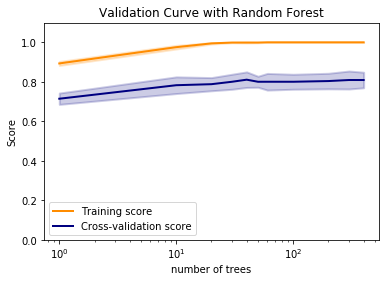

In [17]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Random Forest")
plt.xlabel("number of trees")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [18]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=0).fit(x_train, y_train)
results_test_rf = pd.DataFrame(rf_model.predict_proba(x_test))
results_train_rf = pd.DataFrame(rf_model.predict_proba(x_train))

In [19]:
np.unique(y_train)

array([0, 1])

In [20]:
# Evaluating the Random Forest
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(ytrain, results_train_rf[1], pos_label=1)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
print("AUC-ROC using Random Forest(Train): {}".format(roc_auc_rf))


fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(ytest ,results_test_rf[1], pos_label=1)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
print("AUC-ROC using Random Forest(Test): {}".format(roc_auc_rf))

AUC-ROC using Random Forest(Train): 1.0
AUC-ROC using Random Forest(Test): 0.8636273734177214


In [21]:
fpr_list = [fpr_rf, fpr_sbrl]
tpr_list = [tpr_rf, tpr_sbrl]
roc_auc_list = [roc_auc_rf, roc_auc_sbrl]
label_list = ['Random Forest', 'Decision Rules']

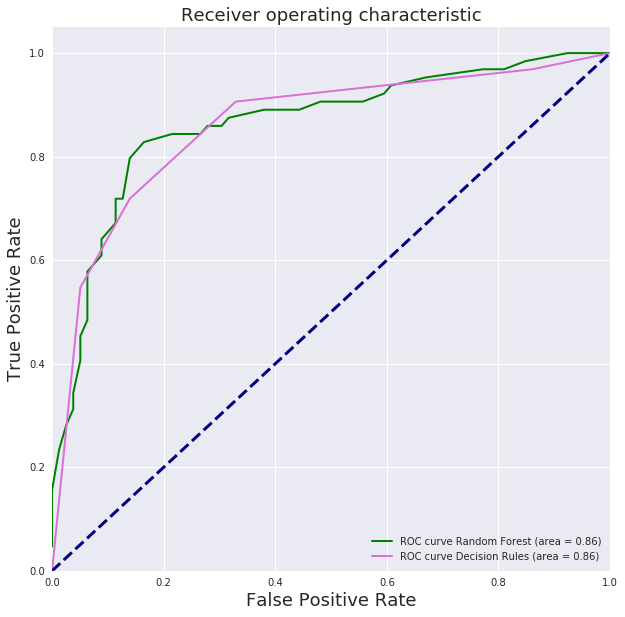

In [22]:
plt.style.use(['seaborn'])
plt.figure(figsize=(10,10))
plt.rc('font', size=12)
lw = 2
colors = ['green', 'orchid']
for i in range(len(fpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i],
         lw=lw, label='ROC curve {0} (area = {1:0.2f})'.format(label_list[i], roc_auc_list[i]), )
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right")

In [23]:
# Save and reload the model and continue with evaluation
sbrl_inst.save_model("titanic_model.pkl")

In [24]:
# Validate in-correct predictions; query for in-correct prediction
_, y_hat  = sbrl_inst.predict(new_X_test)
y_new_test = ytest.apply(lambda f: int(f))

query_for_false_predictions = lambda predictions, ground_truth:  np.where(ground_truth != predictions)
false_predictions = query_for_false_predictions(y_hat, y_new_test)
false_predictions

(array([  1,   2,   4,  11,  12,  17,  18,  25,  28,  37,  39,  41,  42,
         45,  46,  54,  58,  62,  68,  69,  71,  75,  76,  80,  81,  92,
        100, 101, 116, 131, 133, 134, 137]),)

### Observation:
Lets evaluate the above trained model and evaluate reasons for in-correct predictions. 
The trained model is being evaluated on the test dataset with `143` observations. Since, the model is humanly
interpretable; output represented as decision stumps based on input features.

Most valuable features as per the model; 
"Pclass": Ticket class
"Sex_Encoded": Sex of the person male/female
"Parch": Family Relation ; 
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them

Target: Predicting Prob(survival)
[0 = No; 1 = Yes]

Now evaluating, input data at index "1", we can see that the predicted result is "survival"(false positive) but the ground truth is "0"(the passenger didn't survive). Since, the model is easily interpretable, we an infer the cause of in-correct prediction very quickly. The model implies that if the passenger is a female then the likelihood of her surviving is 95% and since the passenger in question is a female we know the reason for false positive. 
** Other decision rules are not contributing to the evaluation.

In [25]:
sbrl_inst.print_model()

The rules list is : 

If      {Pclass=3,Sex_Encoded=0} (rule[148]) then positive probability = 0.42352941

else if {Pclass=3} (rule[165]) then positive probability = 0.16346154

else if {Sex_Encoded=0} (rule[181]) then positive probability = 0.95041322

else if {Pclass=2,Parch=0,Sex_Encoded=1} (rule[107]) then positive probability = 0.05882353

else  (default rule)  then positive probability = 0.39361702



In [26]:
print("Input Data: {}".format(1))
Xtest.iloc[[1]]

Input Data: 1


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_Encoded,Embarked_Encoded
177,178,1,50.0,0,0,28.7125,0,0


In [27]:
sbrl_inst.predict(new_X_test.iloc[[1]])

(0        0.950413
 label         [1]
 Name: 1, dtype: object, array([1]))

In [28]:
print("Predicted label: {}".format(sbrl_inst.predict(new_X_test.iloc[[1]])[1]))
print("Ground truth: {}".format(ytest.iloc[[1]].values[0]))

Predicted label: [1]
Ground truth: 0


In [29]:
# Generating scores for test data as provided by Kaggle
test_titanic_df = pd.read_csv("data/titanic/test.csv")

In [30]:
test_titanic_df["Sex"] = test_titanic_df["Sex"].astype('category')
test_titanic_df["Sex_Encoded"] = test_titanic_df["Sex"].cat.codes

test_titanic_df["Embarked"] = test_titanic_df["Embarked"].astype('category')
test_titanic_df["Embarked_Encoded"] = test_titanic_df["Embarked"].cat.codes
# print(test_titanic_df.head(5))
test_titanic_df_clean = test_titanic_df.drop(['Ticket','Cabin', 'Name', 'Sex', 'Embarked'], axis=1)
print(test_titanic_df_clean.head(5))

# Discretize continuous features
test_titanic = sbrl_inst.discretizer(test_titanic_df_clean, column_list=['Age', 'Fare'])
print("Test:\n{}".format(test_titanic.head(2)))

   PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_Encoded  \
0          892       3  34.5      0      0   7.8292            1   
1          893       3  47.0      1      0   7.0000            0   
2          894       2  62.0      0      0   9.6875            1   
3          895       3  27.0      0      0   8.6625            1   
4          896       3  22.0      1      1  12.2875            0   

   Embarked_Encoded  
0                 1  
1                 2  
2                 1  
3                 2  
4                 2  
Test:
   PassengerId  Pclass  SibSp  Parch  Sex_Encoded  Embarked_Encoded  \
0          892       3      0      0            1                 1   
1          893       3      1      0            0                 2   

       Age_q_label    Fare_q_label  
0  (166.5, 249.25]  (0.999, 105.0]  
1  (249.25, 332.0]  (0.999, 105.0]  


In [31]:
results = sbrl_inst.predict_proba(test_titanic)

In [32]:
results['Survived'] = np.where(results.loc[:, 1].values > 0.5, 1, 0)
results['PassengerId'] = test_titanic['PassengerId'].astype(str)
# Write the results to disk
results[['PassengerId', 'Survived']].to_csv('/home/ubuntu/pramit/Skater/results.csv', index_label=False, index=False)

### Handle datasets bigger than > 1k input examples

In [28]:
sbrl_big = BigDataBRLC(sub_sample_percentage=0.5, min_rule_len=1, max_rule_len=4, iterations=10000, n_chains=3, 
                       surrogate_estimator="SVM")
n_x, n_y = sbrl_big.subsample(Xtrain, ytrain, pos_label=1)
print(len(n_x))

287


In [29]:
# quick scan of the data
n_x.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_Encoded,Embarked_Encoded
472,473,2,33.0,1,2,27.750,0,2
659,660,1,58.0,0,2,113.275,1,0
809,810,1,33.0,1,0,53.100,0,2


In [30]:
model=sbrl_big.fit(n_x, n_y, undiscretize_feature_list=["PassengerId", "Pclass", 
                                                                 "SibSp", "Parch", "Sex_Encoded", "Embarked_Encoded"])

Eclat


parameter specification:


 tidLists
 support
 minlen
 maxlen
            target
   ext


    FALSE
     0.1
      1
      4
 frequent itemsets
 FALSE



algorithmic control:


 sparse
 sort
 verbose


      7
   -2
    TRUE



Absolute minimum support count:
 
11
 



create itemset ... 

set transactions ...
[139 item(s),
 114 transaction(s)] done 
[0.00s].


sorting and recoding items ... 
[19 item(s)] 
done [0.00s].


creating bit matrix ... 
[19 row(s), 114 column(s)] 
done [0.00s].

writing  ... 
[248 set(s)] done 
[0.00s].

Creating S4 object  ... 
done 
[0.00s].

Eclat


parameter specification:


 tidLists
 support
 minlen
 maxlen
            target
   ext


    FALSE
     0.1
      1
      4
 frequent itemsets
 FALSE



algorithmic control:


 sparse
 sort
 verbose


      7
   -2
    TRUE



Absolute minimum support count:
 
17
 



create itemset ... 

set transactions ...
[202 item(s),
 173 transaction(s)] done 
[0.00s].


sorting and recoding items ... 
[20 item(s

In [31]:
sbrl_big.print_model()

The rules list is : 

If      {Sex_Encoded=1} (rule[276]) then positive probability = 0.18709677

else if {Pclass=3} (rule[237]) then positive probability = 0.32352941

else  (default rule)  then positive probability = 0.94029851



### Evaluating model built using BigDataBRLC

In [32]:
# Discretize the test dataset
features_to_be_descrtized = sbrl_big.discretized_features
print(features_to_be_descrtized)
new_X_test = sbrl_inst.discretizer(Xtest, column_list=['Age', 'Fare'])
print("Test:\n{}".format(new_X_test.head(2)))

# prepare the train set using the subsampled dataset
new_X_train = sbrl_inst.discretizer(n_x, column_list=['Age', 'Fare'])
print("Train:\n{}".format(new_X_train.head(2)))

print("-----------------------------------------------------------------")

results_test_sbrl = sbrl_big.predict_proba(new_X_train)
# Compute performance metrics
fpr_sbrl, tpr_sbrl, thresholds_sbrl = metrics.roc_curve(n_y ,results_test_sbrl[1], pos_label=1)
roc_auc_sbrl = metrics.auc(fpr_sbrl, tpr_sbrl)
print("AUC-ROC using SBRL(Train): {}".format(roc_auc_sbrl))

results_test_sbrl = sbrl_big.predict_proba(new_X_test)
# Compute performance metrics
fpr_sbrl, tpr_sbrl, thresholds_sbrl = metrics.roc_curve(ytest ,results_test_sbrl[1], pos_label=1)
roc_auc_sbrl = metrics.auc(fpr_sbrl, tpr_sbrl)
print("AUC-ROC using SBRL(Test): {}".format(roc_auc_sbrl))

['Age_q_label', 'Fare_q_label']
Test:
     PassengerId  Pclass  SibSp  Parch  Sex_Encoded  Embarked_Encoded  \
423          424       3      1      1            0                 2   
177          178       1      0      0            0                 0   

        Age_q_label   Fare_q_label  
423    (36.5, 72.0]   (36.5, 72.0]  
177  (107.5, 143.0]  (72.0, 107.5]  
Train:
     PassengerId  Pclass  SibSp  Parch  Sex_Encoded  Embarked_Encoded  \
472          473       2      1      2            0                 2   
659          660       1      0      2            1                 0   

        Age_q_label    Fare_q_label  
472  (144.0, 215.5]  (144.0, 215.5]  
659  (215.5, 287.0]  (215.5, 287.0]  
-----------------------------------------------------------------
AUC-ROC using SBRL(Train): 0.8042794848392658
AUC-ROC using SBRL(Test): 0.8096321202531647
